# EDA 6. Проектирование экспериментов

###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Введение в проектирование экспериментов](#2)
- [3. Логирование экспериментов](#3)
- [4. Знакомство с Comet.ml](#4)
- [5. Планирование эксперимента и логирование изменений в Comet.ml](#5)
- [6. Итоги](#6)


# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

Если хочется делать качественные выводы, нужна качественная **организация эксперимента** (отслеживание эксперимента).

Отслеживать эксперименты можно как угодно, но лучше использовать для этого специально придуманные под эту задачу инструменты.

# 2. Введение в проектирование экспериментов <a class="anchor" id=2></a>

[к содержанию](#0)

>**Машинное обучение (`ML`)** — это область компьютерных наук, которая использует алгоритмы для создания и обучения моделей для выполнения рутинных задач. 

Типичный подход к управлению проектами машинного обучения основан на проектировании моделей машинного обучения вручную. И обычно он представлен следующими этапами:

<img src=e_6_img1.png>

Этот процесс предполагает, что обученная модель должна быть конечным результатом проекта машинного обучения. Однако такой подход **ошибочен по нескольким причинам**.

* Мир постоянно развивается, стимулируемый прорывными технологиями, что приводит к постоянному **увеличению объёма данных**. Следовательно, данные, которые инженеры машинного обучения должны обрабатывать для обучения моделей, **также постоянно меняются**. 

* Обученная модель может удовлетворить непосредственные потребности заказчика только на основе данных, которые ей были предоставлены, но в долгосрочной перспективе она может оказаться неэффективной, поскольку **она не приспосабливается автоматически** к изменениям в наборах данных. 

>Например, если вы хотите использовать готовую модель анализа спроса на лекарства, которая была обучена на данных покупателей (регион проживания, цвет глаз, возраст), но о новых покупателях нет возможности собрать подобные данные (в анкетах больше не указывались цвет глаз и регион проживания),

Обновления в фиксированных наборах данных, используемых для обучения, приводят к изменениям в модели, что снижает её точность. В примере выше столбцы регион и цвет глаз будут иметь пропуски для новых клиентов, а следовательно, прогноз модели, который является суммой признаков, умноженных на обученные коэффициенты, не будет достоверным.

>Это особенно важно для проектов в сфере здравоохранения. Чем выше точность показывает модель при классификации медицинских изображений, тем выше шансы, что она сможет соперничать с профессиональными медиками в постановке точных диагнозов, исключая риск человеческой ошибки.

**Точность модели (`accuracy`)** машинного обучения определяется как *процент правильных прогнозов* для тестовых данных и рассчитывается путём деления количества правильных прогнозов на общее количество прогнозов. Обычно это определяющий фактор при оценке успеха проекта машинного обучения — чем выше точность, тем лучше работает модель машинного обучения. 

Например, вы оцениваете спрос на товар. Ваша цель — узнать, купит ли клиент продукт. Вы строите модель на основе данных и реальных ответов, а затем сравниваете свои предсказания и реальные ответы. Если предсказания совпадают с реальными ответами чаще, чем в 90 % случаях, то обычно говорят, что модель надёжна, и её можно использовать для предсказаний спроса уже других клиентов. 

## КАК ДОБИТЬСЯ ЛУЧШЕЙ ТОЧНОСТИ МОДЕЛИ ML?

Чтобы оптимизировать метрики для тестовых данных, необходимо пространство для многочисленных экспериментов. Экспериментирование с различными архитектурами моделей, кодом предварительной обработки и параметрами модели, определяющими успех процесса обучения, несколько раз приводит к повторному обучению модели. Всё это вы будете изучать в будущих модулях, посвящённых моделированию в ML.  

Возникает необходимость отслеживания экспериментов, то есть сохранения всей важной информации, связанной с каждым запускаемым экспериментом, например сохранение параметров запуска, влияющих на производительность модели. Выполнять эту задачу вручную обременительно, поэтому имеет смысл поставить для процесса автоматизированную инфраструктуру — **пайплайн** (`pipeline`) машинного обучения.

**Пайплайном** (`pipeline`) в ML называется способ систематизации и автоматизации рабочего процесса, необходимого для создания модели машинного обучения. Пайплайны состоят из нескольких последовательных шагов, которые выполняют всё — от извлечения и предварительной обработки данных до обучения и проверки моделей.

Пайплайн машинного обучения состоит из следующих шагов:

<img src=e_6_img2.png width=500>

Этот рабочий процесс позволяет осуществлять непрерывную настройку существующих моделей наряду с постоянной оценкой производительности. Самым большим преимуществом этого процесса является то, что его можно автоматизировать с помощью доступных инструментов.

Для медицинских стартапов это означает, что они могут получить модель машинного обучения для конкретного проекта, которая будет постоянно обновляться по мере поступления новых данных о пациентах, что приведёт к более высокой точности полученных результатов.

>Представьте, что вы специалист по данным, а ваша компания сотрудничает с медицинскими учреждениями. Перед вами стоит задача выяснить, почему люди, получившие инструкции по лечению, не приходят на следующий приём. В качестве набора данных вы используете информацию о посещениях и характеристики пациентов. 

Каждая история болезни характеризуется следующими признаками:

* No_show — пациент не пришёл на приём;
* Gender — пол пациента;
* ScheduledDay — день, когда планируется встреча;
* AppointmentDay — реальная дата встречи;
* Age — возраст пациента;
* Neighbourhood — район проживания каждого пациента;
* Scholarship — получает ли пациент стипендию;
* …и несколько других признаков.

1. Первым этапом данных является [загрузка данных](https://www.kaggle.com/datasets/joniarroba/noshowappointments): 

In [1]:
import pandas as pd

df = pd.read_csv('archive.zip')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:

* Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
* Кто не появляется чаще — мужчины или женщины?

2. Для ответа на эти и другие подобные вопросы используется `EDA`.

Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:

Text(0.5, 1.0, 'Соотношение людей, которые пропускают приёмы, к тем кто не пропускает')

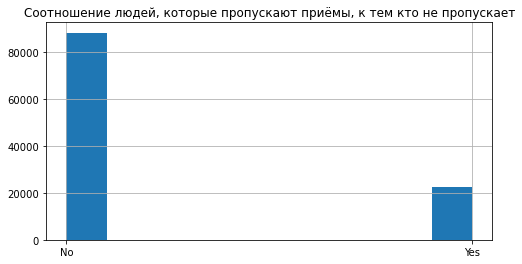

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приёмы, к тем кто не пропускает')

Или, если мы хотим получить точную пропорцию, — с помощью метода `value_counts()`:

In [7]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:

In [8]:
df[df['No-show'] == 'Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

Итак, мы видим, что людей, пропускающих приём, примерно 20 %.
Из них 65% женщины, остальные мужчины.

3. После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например `‘Gender’` и `‘Neighbourhood’`, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для `one-hot` кодировки можно воспользоваться методом `get_dummies()` библиотеки pandas:

In [10]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns=categorical_columns_names)
encoded_columns.head(3)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4. После этих этапов можно переходить к созданию предсказания, придёт ли пациент на приём, обучению и оптимизации модели, а также выделению наиболее важных признаков, способствующих высокой производительности модели. Об этом вы узнаете в будущих модулях!  

Предположим, вы несколько раз обучили модель с разными параметрами, подобрали наилучшие и достигли `accuracy > 0.9`. То есть доля верных предсказаний превышает 90 %. Также вы узнали, что наибольший вклад в модель вносят такие признаки, как пол, регион и факт наличия стипендии. Про влияние пола на результат вы догадались во время проведения EDA, регион кажется тоже понятным фактором: люди в крупных городах больше склонны приходить на последующий назначенный прием, `а вот факт наличия стипендии — не такой очевидный фактор`. 

Это подтверждает тезис о том, что модели машинного обучения могут рассматриваться как чёрный ящик: нечто, куда мы кладём свои данные и получаем предсказание. Не всегда результаты прогнозов легко интерпретируемы. Обычно существует **трэйд-офф** между качеством модели и её интерпретируемостью: чем сложнее модель, тем выше, но менее очевиден её результат.    

⬇️ Ноутбук с продемонстрированным кодом доступен [по ссылке](https://lms.skillfactory.ru/assets/courseware/v1/a60205a7aef74bb8877c204d4c570551/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/noshowappointments.ipynb).

# 3. Логирование экспериментов <a class="anchor" id=3></a>

[к содержанию](#0)

>Итак, запуск экспериментов по машинному обучению включает в себя множество задач, таких как EDA и предобработка данных. В последнюю может входить заполнение пропусков данных, проверка различных алгоритмов с целью поиска наилучшего, анализ производительности модели и другие связанные задачи, которые зависят от решаемой проблемы.

Как вы уже знаете, в процессе проведения эксперимента по машинному обучению можно использовать функцию `print()` для просмотра выходных данных экспериментов, таких как уровень корреляции данных в выборке, результат тестирования статистической гипотезы и так далее. 

Однако время от времени выводить результат на экран с помощью функции `print()` **бесполезно**, так как при запуске следующего эксперимента вы потеряете все результаты предыдущего эксперимента, **если не запишете их вручную в документ**. 

Таким образом, сравнение результатов ML-экспериментов становится весьма затруднительным процессом, потому что необходимо иметь записи всех проводимых ранее экспериментов. Например, если во время EDA-задачи предсказания спроса на лекарство изменяются данные, то каждый раз выводить на экран новую визуализацию неудобно. 

Логирование решает эту проблему! Даже если информация изменится с запуском нового эксперимента, всё будет зафиксировано в логе. 

**Лог** (`log`) — это специальный журнал, в котором хранится информация о состоянии работы программы. Логирование (ведение журнала) обеспечивает отслеживание событий, происходящих во время работы программы, и может выводить эти события в отдельный файл, чтобы вы могли отслеживать, что происходит во время выполнения кода. 

Пример такого файла: 

<img src=e_6_img3.png>

Здесь зафиксирована информация о форме данных и соотношение классов целевой переменной `Gender`. Это даёт возможность отлаживать код. Далее мы подробнее разберём, как создавать логи. 

Для логирования в `Python` используется модуль `logging`. Он используется большинством сторонних библиотек `Python`, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [11]:
import logging

Прежде чем приступить к логированию, необходимо установить базовые настройки:

* уровень;
* обработчик (хендлер);
* формат логирования. 

## НАСТРОЙКА УРОВНЯ ЛОГИРОВАНИЯ

<img src=e_6_img4.png width=600>

С импортированным модулем `logging` вы можете использовать так называемый `«logger»` для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой `print()`). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

* отладка;
* информация;
* предупреждение;
* ошибка;
* критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является **критическим**. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [12]:
import logging
logging.debug('Это сообщение отладки')
logging.info('Это информационное сообщение')
logging.warning('Это сообщение-предупреждение')
logging.error('Это сообщение об ошибке')
logging.critical('Это критическое сообщение')

ERROR:root:Это сообщение об ошибке
CRITICAL:root:Это критическое сообщение


Здесь мы дали команду залогировать пять сообщений. Вывод команд показывает уровень важности перед каждым сообщением (`WARNING/ERROR/CRITICAL`). `root` — имя логера по умолчанию.

Этот формат, который показывает уровень, имя и сообщение, разделенные двоеточием (`:`), является форматом вывода по умолчанию. Его можно изменить для включения таких вещей, как отметка времени, номер строки и других деталей. Мы научимся делать это чуть ниже.

>Обратите внимание, что сообщения `debug()` и `info()` не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (`WARNING`) или выше. Вы можете изменить это, сконфигурировав модуль `logging` для регистрации событий всех уровней, то есть установив уровень на ОТЛАДКУ (`DEBUG`). 

В приведённом ниже примере кода показано, как можно настроить уровень ведения журнала на `DEBUG`.

In [13]:
logging.basicConfig(level=logging.DEBUG)
logging.debug('Сообщение будет залогировано!')

Мы настроили уровень ведения журнала `DEBUG`, что означает, что будут отслеживаться только сообщения этого уровня (`DEBUG`) и выше.

Помимо файла лог может быть записан и в другой формат. Для этого используются обработчики (хендлеры) логов.

## УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

Функция обработчиков ведения журналов состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Более того, у созданного вами `logger` может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по email одновременно. Подробнее ознакомиться с видами хендлеров можно [здесь](https://digitology.tech/docs/python_3/library/logging.handlers.html).

Обработчики являются классами модуля `logging`. Нам понадобится обработчик `FileHandler`, который возьмёт запись/сообщение журнала и добавит его в файл журнала `log_file.log`:

In [14]:
logging.FileHandler('log_file.log')

<FileHandler c:\Личные документы\Python\Py\eda_6_experiments\log_file.log (NOTSET)>

## УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

Как мы уже сказали, типичный формат лога выглядит так: `уровень: имя: сообщение`. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала.

In [18]:
logging.basicConfig(format="%(levelname)s: %(asctime)s: %(message)s", level=logging.DEBUG)
logging.info('Проверка')


Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Таким образом, вы можете изменять как формат лога, так и формат вывода. Добавление времени сообщения существенно облегчает работу — становится легко отследить, когда было получено сообщение.

Теперь, когда вы понимаете основы модуля `logging` в Python, посмотрим, как можно его использовать при проведении экспериментов по машинному обучению. Давайте залогируем информацию о нашем датасете [Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments). 

Создадим функцию `log()` для генерации лог-файла и записи в него информации.

In [31]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  import os
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

Итак, `get_logger` принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. Для того, чтобы освежить в памяти знания по работе с файлами, вы можете вернуться к Блоку 2 нашего курса («Подгрузка данных»).  

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды `mkdir`:

In [32]:
!mkdir logs

�������� ��� 䠩� logs 㦥 �������.


In [33]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

В директории `logs` появится файл `data.logs`, который будет выглядеть следующим образом:

<img src=e_6_img3.png>

Отлично! Мы зафиксировали информацию о датасете в лог-файл. Такой файл отражает сведения о том, что всё работает в штатном режиме (то есть просто ежедневный мониторинг программы) или что произошла какая-то ошибка, на которую нужно максимально срочно отреагировать и устранить. Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

In [35]:
if df.shape != (110526,14):
    logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


# 4. Знакомство с Comet.ml <a class="anchor" id=4></a>

[к содержанию](#0)

`Comet.ml` — это онлайн-платформа, позволяющая отслеживать эксперименты. Основное преимущество Comet состоит в том, что с её помощью можно легко построить панель отчётности и систему мониторинга.

<img src=e_6_img5.png width=200>

`Comet` предоставляет следующие возможности:

* сравнивать эксперименты с точки зрения метрик, параметров и так далее;
* следить за моделью от создания до вывода в продакшен;
* делиться своим проектом с другими людьми, которые в режиме реального времени будут следить за результатами;
* строить отчёты исходя из результатов эксперимента;
* оставить проект приватным или сделать его общедоступным.

Для начала работы с платформой [Comet.ml](https://www.comet.com/site/) необходимо зарегистрировать бесплатную учётную запись. После этого вы сможете создавать как публичные, так и приватные проекты. 

<img src=e_6_img6.png width=400>

После создания проекта появится пустая доска, на которую можно добавить эксперименты, нажав на кнопку `+Add`. 

<img src=e_6_img7.png width=600>

Платформа генерирует новый `API` для эксперимента, который можно использовать в коде `Python`:

In [6]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="gUJB4A5Xyni7vEzn5F7be7scu",
    project_name="midecal-appointment",
    workspace="hoittoken",)

ImportError: cannot import name 'ConfigIniEnv' from 'everett.manager' (c:\Users\AubakirovMA\Anaconda3\lib\site-packages\everett\manager.py)

>Класс `Experiment` — это интерфейс локального кода для `Comet`. Он определяет множество методов, описанных в официальной документации `Comet`. Платформа позволяет хранить информацию о коде, логировать графики, гиперпараметры модели (о них вы узнаете дальше в курсе), метрики. 

Давайте рассмотрим некоторые популярные методы:

* `log_metric()` и `log_metrics()` — логируют в эксперименте одну или несколько оценочных метрик, таких как accuracy;
* `log_figure()` — логирует рисунок;
* `display()` — создаёт интерактивную среду в `Jupyter`, показывающую приборную панель `Comet` как вывод ячейки;
* `end()` — если эксперимент выполняется в `Jupyter`, этот метод указывает, что эксперимент завершён.

После завершения эксперимента `Comet` предоставляет информационную панель, где можно увидеть все залогированные в коде метрики, цифры, параметры и так далее.

Показатели оценки отображаются автоматически. Например, если эксперимент состоит из нескольких шагов, можно легко нарисовать графики, показывающие метрики в зависимости от количества шагов.

Ниже представлен пример графика, иллюстрирующего изменение `accuracy` на каждом шаге обучения нейронной сети (про нейронные сети вы узнаете далее по курсу). 

<img src=e_6_img8.png><img src=e_6_img9.png width=511>

Итак, `Comet.ml` — это платформа для экспериментов с машинным обучением, которую специалисты по данным используют для отслеживания, сравнения и объяснения своих экспериментов по машинному обучению. Она обеспечивает воспроизведение моделей, простое обслуживание рабочего процесса машинного обучения и бесперебойную совместную работу на протяжении всего жизненного цикла проекта.  

Например, вы в команде строите модель оценки спроса на лекарство. Вы можете разделить пайплайн машинного обучения между участниками проекта, при этом каждый участник получит возможность отслеживать все эксперименты каждого этапа в `Comet`: от логирования визуализаций до подбора параметров обучения модели и оценки её производительности.

# 5. Планирование эксперимента и логирование изменений в Comet.ml <a class="anchor" id=5></a>

[к содержанию](#0)

# 6. Итоги <a class="anchor" id=6></a>

[к содержанию](#0)